## <center>*Learning from Data - Coursework*</center>
# <center>Indicators of Heart Disease (2022 UPDATE)</center>

**Intended Learning Outcomes (ILOs)**:
+ Apply principles for statistical and neural pattern recognition to novel data.
+ Analyse novel pattern recognition and classification problems, establish models for them and write software to solve them.
+ Utilise a range of supervised and unsupervised pattern recognition and machine learning techniques to solve a wide range of problems.
+ State the importance and difficulty of establishing principled models for pattern recognition.
+ Use Python or other programming languages for scientific analysis and simulation.
+ Identify the compromises and trade-offs that must be made when translating theory into practice.
+ Critically read and report on research papers.

**Dataset** for Advanced Analysis: ["Indicators of Heart Disease (2022 UPDATE)"](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease "Indicators of Heart Disease (2022 UPDATE)") (click to download the dataset from Kaggle)
<br> <br> The dataset originally comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to collect data on the health status of U.S. residents. As described by the CDC: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states, the District of Columbia, and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.
<br> <br> **About the Dateset:**
The Diabetes dataset contains a variety of parameters. For the purposes of this analysis, I have specifically selected those parameters that are recognized for their influence on heart health for further examination.
+ State: str, The US State name
+ Sex: str, Male or Female
+ GeneralHealth: str, How is the well-being in general terms
+ PhysicalHealthDays: float, Number of days in a month had physical health issues
+ MentalHealthDays: float, Number of days in a month had mental health issues
+ LastCheckupTime: str, Last medical check-up done
+ PhysicalActivities: bool, If done physical activities in past 30 days
+ SleepHours: float, Number of hours of sleep
+ RemovedTeeth: str, if removed any teeth
+ HadAngina: bool, had Angina(severe chest pain) previously
+ HadStroke: bool, had stroke previously
+ HadAsthma: bool, has asthma
+ HadSkinCancer: bool, has skin cancer previously
+ HadCOPD: bool, has chronic obstructive pulmonary disease
+ HadDepressiveDisorder: bool, has depressive disorder
+ HadKidneyDisease: bool, has kidney disease
+ HadArthritis: bool, has arthritis
+ HadDiabetes: bool, has diabetes
+ DeafOrHardOfHearing: bool, if deaf of hard of hearing
+ BlindOrVisionDifficulty: bool, if blind or vision difficulty
+ DifficultyConcentrating: bool, if had Difficulty Concentrating in the past 30 days
+ DifficultyWalking: bool, if had Difficulty Walking in the past 30 days
+ DifficultyDressingBathing: bool, if had Difficulty Dressing or Bathing in the past 30 days
+ DifficultyErrands: bool, if had Difficulty or Errands in the past 30 days
+ SmokerStatus: str, if smokes
+ ECigaretteUsage: str, if used e-cigarettes
+ ChestScan: bool, if done chest scan
+ RaceEthnicityCategory: str, Race or ethnicity
+ AgeCategory: str, age category
+ HeightInMeters: float, height in meters
+ WeightInKilograms: float, weight in kilograms
+ BMI: float, BMI index
+ AlcoholDrinkers: bool, if drinks alcohol
+ HIVTesting: bool, if tested HIV positive
+ FluVaxLast12: bool, if taken Flu vaccine in the past 12 months
+ PneumoVaxEver: bool, if taken Pneumonia vaccine
+ TetanusLast10Tdap: str, if received tetanus in last 10 years
+ HighRiskLastYear: bool, if was in high risk category lasst year
+ CovidPos: bool, if was tested covid positive
+ HeartDisease: bool, if has heart disease

### **1.** Loading Dataset

In [724]:
# Import modules

# Pandas
import pandas as pd

import time
# Train test split
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [725]:
# Load the dataset csv file
dataFrame = pd.read_csv('HeartDiseaseDataset.csv')

In [726]:
# Print top 5 rows from the dataset
dataFrame.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,No
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,No


In [727]:
# Print column names
dataFrame.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HeartDisease'],
      dtype='object')

### **2.** Data preprocessing

a. Clean the data, remove null and duplicate values

In [728]:
# Check if any column in the dataframe has null values
dataFrame.columns[dataFrame.isnull().any()].tolist()

[]

In [729]:
# Drop null and duplicate values
dataFrame.dropna(inplace=True)
dataFrame.drop_duplicates(inplace=True)

In [ ]:
# Only use the columns data which are known to have an effect on heart health
dataFrame = dataFrame[['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 
                      'SleepHours', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 
                      'HadArthritis', 'HadDiabetes', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 
                      'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory',
                      'AgeCategory', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'HighRiskLastYear', 'HeartDisease']]

In [731]:
print(dataFrame.columns)

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory',
       'AgeCategory', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'HighRiskLastYear', 'HeartDisease'],
      dtype='object')


### **3.** Data model

In [ ]:
labelEncoder = LabelEncoder()
categoricalCols = dataFrame.select_dtypes(include=['object']).columns

for column in categoricalCols:
    dataFrame[column] = labelEncoder.fit_transform(dataFrame[column])

**a.** Split dataset into training and test data

In [718]:
# Separate features and target
X = dataFrame.drop(columns=['HeartDisease'], axis=1)
y = dataFrame['HeartDisease']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#linkage_matrix = linkage(df_scaled)
#
## Plot the dendrogram
#plt.figure(figsize=(10, 7))
#plt.title("Hierarchical Clustering Dendrogram")
#dendrogram(linkage_matrix, labels=df_scaled.index, leaf_rotation=90, leaf_font_size=8)
#plt.xlabel("Data Points")
#plt.ylabel("Distance")
#plt.show()

**b.** Logistic Regression

In [719]:
# Use Logistic Regression
models = [
          # Logistic regression
          LogisticRegression(),

          # Logistic regression with class weight as balanced(weights associated with class)
          LogisticRegression(class_weight='balanced'),

          LogisticRegressionCV(class_weight='balanced'),
          
          RandomForestClassifier(n_estimators=100, random_state=3), # Random Forest Classifier
          
          KNeighborsClassifier(n_neighbors=5) # K Nearest Neighbours
         ]

for model in models:
    print("---------------------------------------------")
    print(f"{model}")

    startTime = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    executionTime = time.time() - startTime
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Model Accuracy: {accuracy:.3f}")
    print(f"Model Precision: {precision:.3f}")
    print(f"Model Recall: {recall:.3f}")
    print(f"Model F1: {f1:.3f}")
    print(f"Execution time: {executionTime:.3f}s")

---------------------------------------------
LogisticRegression()
Model Accuracy: 0.948
Model Precision: 0.934
Model Recall: 0.948
Model F1: 0.936
Execution time: 0.167s
---------------------------------------------
LogisticRegression(class_weight='balanced')
Model Accuracy: 0.838
Model Precision: 0.940
Model Recall: 0.838
Model F1: 0.876
Execution time: 0.165s
---------------------------------------------
LogisticRegressionCV(class_weight='balanced')
Model Accuracy: 0.855
Model Precision: 0.941
Model Recall: 0.855
Model F1: 0.887
Execution time: 2.141s
---------------------------------------------
RandomForestClassifier(random_state=3)
Model Accuracy: 0.947
Model Precision: 0.933
Model Recall: 0.947
Model F1: 0.936
Execution time: 13.364s
---------------------------------------------
KNeighborsClassifier()
Model Accuracy: 0.944
Model Precision: 0.930
Model Recall: 0.944
Model F1: 0.934
Execution time: 9.032s


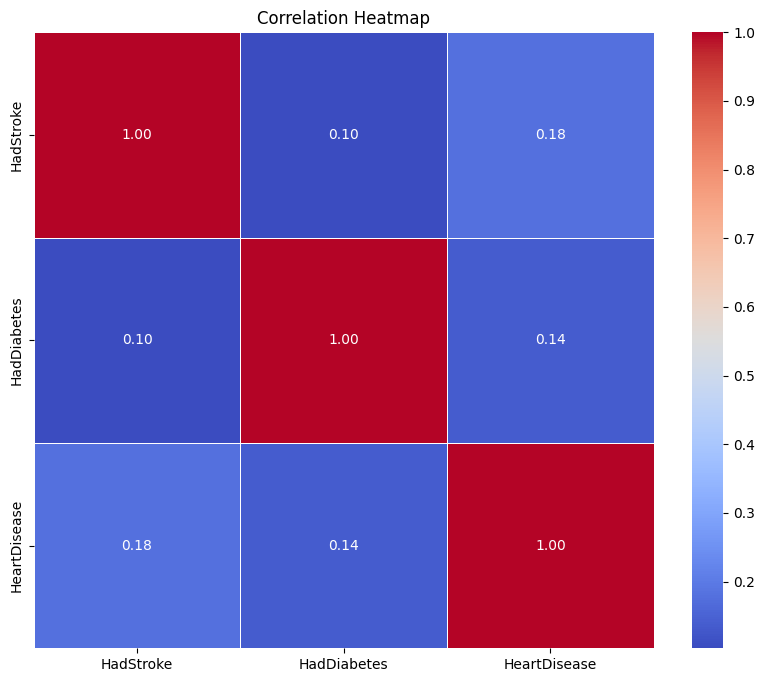

In [720]:
# get the correlation matrix of these three columns
df_insights = dataFrame[['HadStroke', 'HadDiabetes', 'HeartDisease']]
df_insights.describe()

correlation_matrix = df_insights.corr()

# create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [721]:
# Classification report and confusion matrix
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

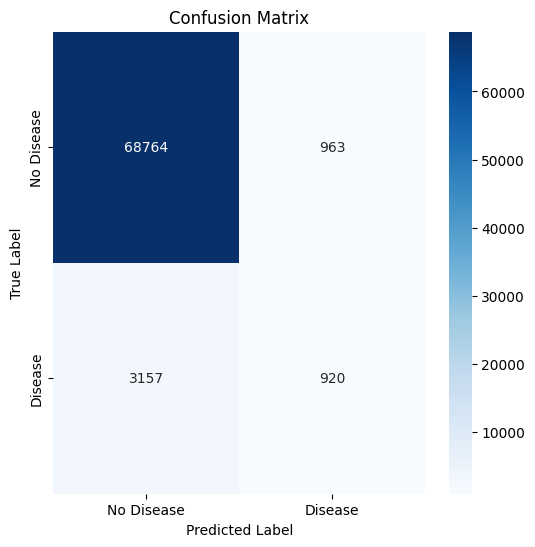

In [722]:
# Heatmap for Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

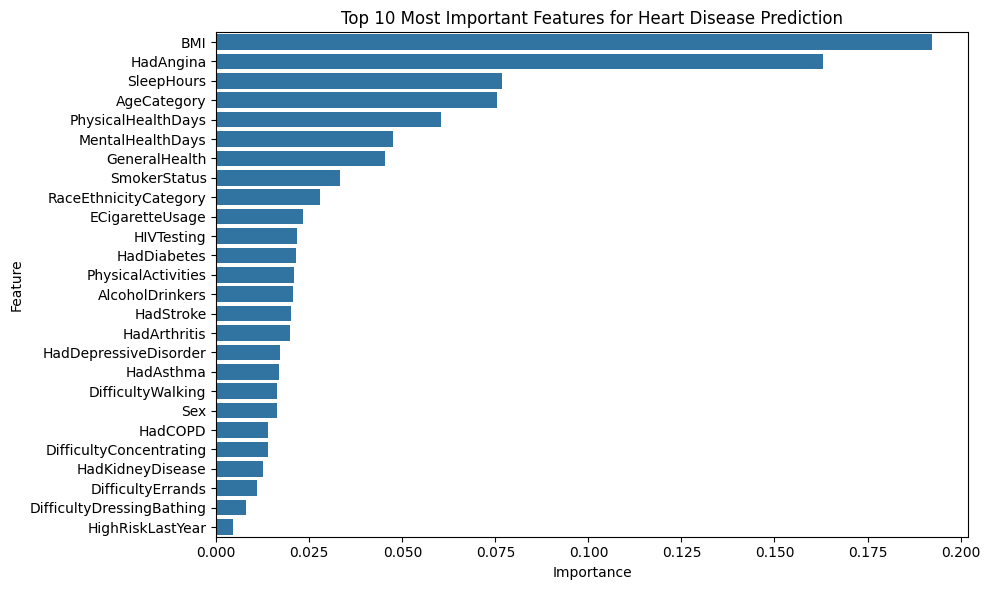

Model Performance Metrics:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     69727
           1       0.49      0.23      0.31      4077

    accuracy                           0.94     73804
   macro avg       0.72      0.61      0.64     73804
weighted avg       0.93      0.94      0.93     73804


Top Correlations with Heart Disease:
HeartDisease                 1.000000
HadAngina                    0.445902
HadStroke                    0.177149
AgeCategory                  0.172181
DifficultyWalking            0.159884
HadDiabetes                  0.135104
PhysicalHealthDays           0.133422
HadCOPD                      0.133220
HadArthritis                 0.117772
HadKidneyDisease             0.109353
DifficultyErrands            0.089492
DifficultyDressingBathing    0.083089
Sex                          0.073317
DifficultyConcentrating      0.051661
BMI                          0.030409
MentalHealthDays             0.025888


In [723]:
# Calculate feature importance

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': models[3].feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)


# Create visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 10 Most Important Features for Heart Disease Prediction')
plt.tight_layout()
plt.show()

# Display key metrics
print("Model Performance Metrics:")
print(classification_report(y_test, y_pred, zero_division=0.0))


# Calculate correlation with heart disease
correlation = dataFrame.corr()['HeartDisease'].sort_values(ascending=False)
print("\nTop Correlations with Heart Disease:")
print(correlation)


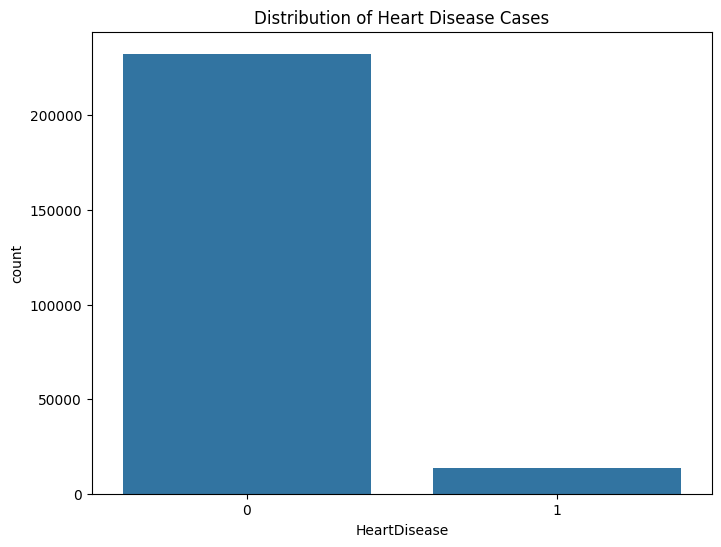

In [ ]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=dataFrame, x='HeartDisease')
plt.title('Distribution of Heart Disease Cases')
plt.show()

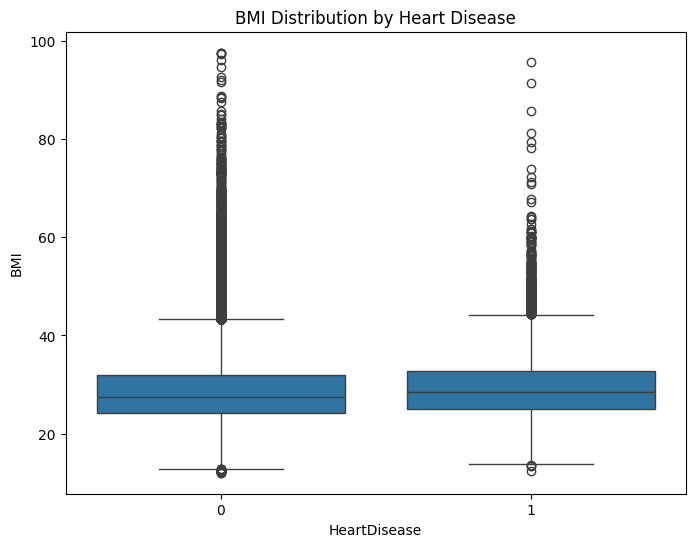

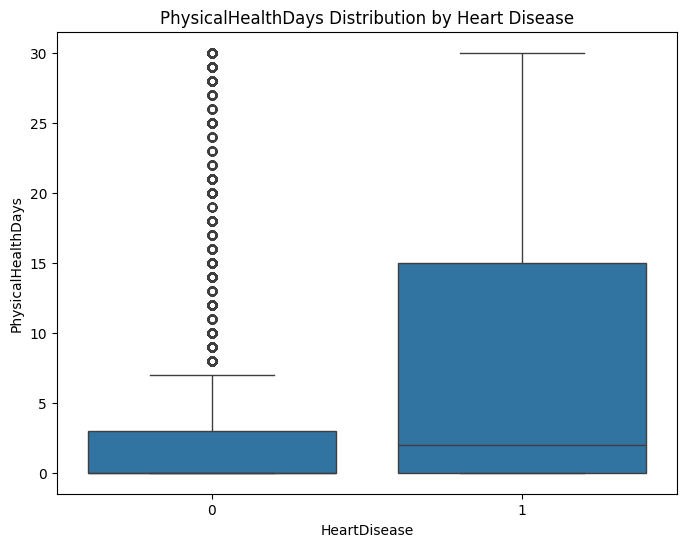

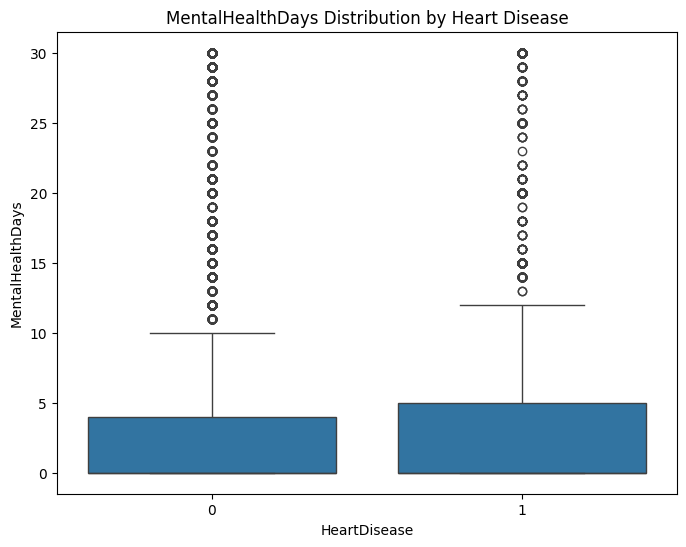

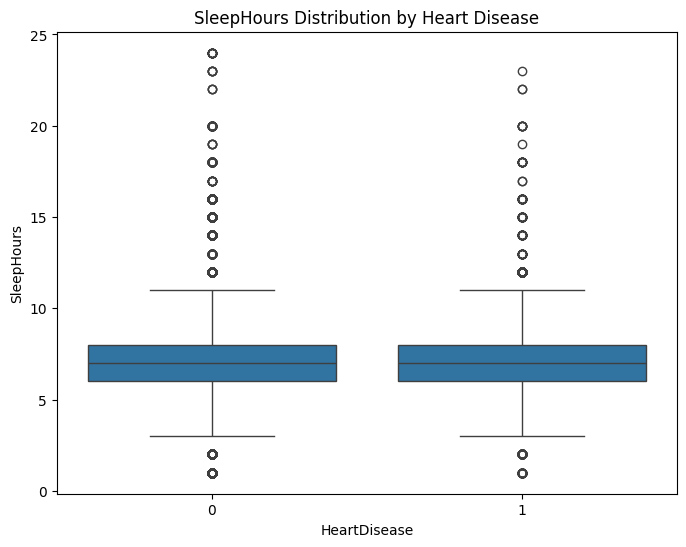

In [ ]:
# Feature distributions by target
numerical_cols = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']
for column in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataFrame, x='HeartDisease', y=column)
    plt.title(f'{column} Distribution by Heart Disease')
    plt.show()

In [ ]:
# Create relevant features
#dataFrame['toss_win_bat'] = (dataFrame['toss_decision'] == 'bat').astype(int)
#dataFrame['is_knockout'] = dataFrame['match_type'] != 'League'
#
## Select features for modeling
#features = ['team1', 'team2', 'venue', 'toss_winner', 'toss_decision', 'toss_win_bat', 'is_knockout', 'target_runs', 'target_overs']
#target = 'winner'


In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import LabelEncoder
#
## Encode categorical variables
#le = LabelEncoder()
#dataFrame['team1'] = le.fit_transform(dataFrame['team1'])
#dataFrame['team2'] = le.fit_transform(dataFrame['team2'])
#dataFrame['venue'] = le.fit_transform(dataFrame['venue'])
#dataFrame['toss_winner'] = le.fit_transform(dataFrame['toss_winner'])
#dataFrame['toss_decision'] = le.fit_transform(dataFrame['toss_decision'])
#
#
##print(dataFrame)
#
## Split data
#X = dataFrame[features]
#y = dataFrame[target]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
#
## Train model
#rf_model = RandomForestClassifier(n_estimators=100)
#rf_model.fit(X_train, y_train)

In [ ]:
#dataFrame.drop(dataFrame[dataFrame['winner'].isna()].index, inplace=True)